# TP4 : K-nearest neighbours & cython

## A. Useful iterable objects: _range_, _enumerate_ , _zip_, dictionaries...
When using loops, _iterators_ can take various forms. When using a simple number, _range()_ is fine as in:

In [49]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [50]:
for i in range(5):
    print(i)

0
1
2
3
4


_range()_ is **iterable**, not building an explicit list in the memory. 
You may also use simple lists as in:

In [51]:
words = ['cat', 'window', 'defenestrate']
for w in words:
    print(w, len(w))

cat 3
window 6
defenestrate 12


If you want to use both the element of a list and its index inthis list, **enumerate()** might be useful.
Go to <https://docs.python.org/3.6/library/functions.html#enumerate> for more information.

In [52]:
for i, v in enumerate(['tic', 'tac', 'toe']):
    print(i, v)

0 tic
1 tac
2 toe


When looping through **dictionaries**, the key and corresponding value can be retrieved at the same time using the items() method.

In [53]:
knights = {'gallahad': 'the pure', 'robin': 'the brave'}
for k, v in knights.items():
    print(k, v)

gallahad the pure
robin the brave




To loop over two or more sequences at the same time, the entries can be paired with the **zip()** function.

In [54]:
questions = ['name', 'quest', 'favorite color']
answers = ['lancelot', 'the holy grail', 'blue']
for q, a in zip(questions, answers):
    print('What is your {0}?  It is {1}.'.format(q, a))

What is your name?  It is lancelot.
What is your quest?  It is the holy grail.
What is your favorite color?  It is blue.


Note in passing how the final string has been obtained using _.format(q,a)_.

Go to <https://docs.python.org/3.6/tutorial/datastructures.html#tut-loopidioms> for more details on loops.

## B. Classification using the K-nearest neighbours algorithm

This practical is a first introduction to classification using the most intuitive non parametric method : K nearest neighbours. The principle is the following. A set of labelled observations which can belong to 2 classes is given as a learning set. Then new observations must be classified as either of class 1 or 2. The principle of K-NN is to label a new observation from the most frequent label among its K nearest neighbours.

### 1. Using synthetic data
Load the training and test data sets synth_train.txt and synth_test.txt. Targets belong to {1,2} and entries belong to $\mathbb{R}^2$. We have 100 training data samples and 200 test samples.
    * the 1st column contains the label of the class the sample,
    * columns 2 & 3 contain the coordinates of each sample in 2D.


In [68]:
# load the training set
train = np.loadtxt('synth_train.txt')  #...,delimiter=',') if there are ',' as delimiters
class_train = train[:,0]
x_train = train[:,1:]
N_train = train.shape[0]
print(N_train)

100


In [67]:
# load the test set
test = np.loadtxt('synth_test.txt') 
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]
x_test = test[:,1:]
N_test = test.shape[0]
print (N_test)

200


##   TO DO:
    a. Display the training set and distinguish the two classes. The function scatter can be useful.
    b. Implement the K-nearest neighbours algorithm for classification.
    c. Compute the error rate on the training set and the test set for K = 1,...,30.
    d. Comment on your results. Which value of K seems optimal ?

_Indication 1:_ Python functions to sort, norm and replicate (see `tile()`) matrices may be useful to compute and sort distances to a given data point while limiting the number of loops 'for'.

_Indication 2:_ if class_pred contains the predicted labels for N_test samples, one can display classification results by using:

<IPython.core.display.Javascript object>


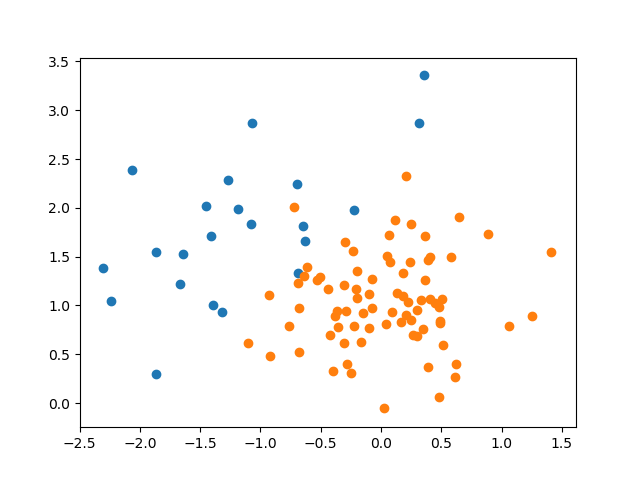

In [58]:
# Code a. Display the training set and distinguish the two classes. The function scatter can be useful.


indx_1 = np.flatnonzero(train[:,0]==1) #indices of elements from classe 1
indx_2 = np.flatnonzero(train[:,0]==2) #indices of elements from classe 2

plt.scatter (x_train[indx_1,0],x_train[indx_1,1])
plt.scatter (x_train[indx_2,0],x_train[indx_2,1])


<IPython.core.display.Javascript object>


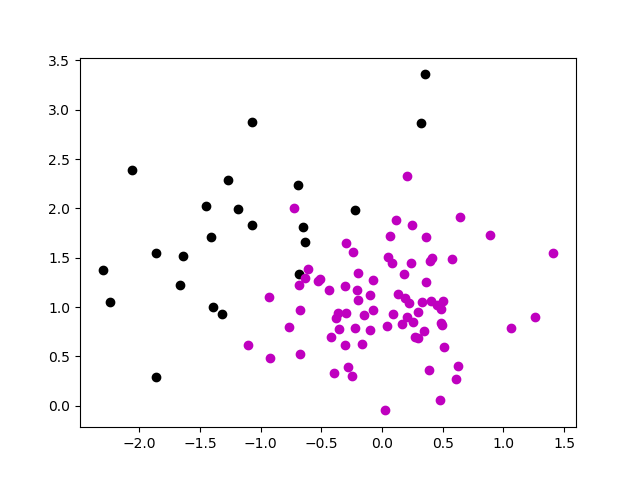

In [59]:
plt.figure()
plt.plot(train[class_train==1,1],train[class_train==1,2],'ko')  # class 1 in black
plt.plot(train[class_train==2,1],train[class_train==2,2],'mo')  # class 2 in magenta

plt.show()

# plt.plot(test[class_pred==1,1],test[class_pred==1,2],'rs')  # red = predicted class = 1
# plt.plot(test[class_pred==2,1],test[class_pred==1,2],'gs')  # green = predicted class = 2

where `class_pred` contains the class predicted by your K-NN algorithm (TO DO !).

In [79]:
# b. Implement the K-nearest neighbours algorithm for classification.
K = 1

# Compute all distances between training set and point
# distances : (N_size x N_train) : distances[i,j] gives the distance between test point i and training point j 
print(x_test.shape)
print(np.tile (x_test,(1,N_train)).shape)
tile_x_test = np.tile(x_test,(1,N_train))
tile_x_train = np.tile(x_train.reshape(N_train*2), (N_test,1))
distances = np.square(tile_x_test - tile_x_train) #vérifier
print(distances.shape)

(200, 2)
(200, 200)
(200, 200)


In [73]:
# c. Compute the error rate on the training set and the test set for K = 1,...,30.
a = np.array([[1,2],[3,4]]).reshape(4,)

print(np.tile(a,(4,1)))

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [ ]:
# d. Comment on your results. Which value of K seems optimal ?

### 2. Application to a real data set : Breast cancer Wisconsin.

** TO DO: Apply the K-NN classifier to the provided set wdbc12.data.txt.**

Information about the data is provided in `wdbc12.names.txt`.

### 3. Making K-NN faster using `cython`

Cython is a package that permits to interface C code with Python easily. It may be useful to make your code faster for a small coding effort, in particular when using long loops.

See <http://docs.cython.org/en/latest/src/tutorial/cython_tutorial.html> for more details.

_Indication : an example is given in the notebook_ **`cython_example.ipy`**.

** TO DO (subsidiary):** Here you may use it to implement a faster version of K-NN.

### ALERT for Windows'users
**Cython does not work properly if some precautions are not taken into account !**

See <https://github.com/cython/cython/wiki/CythonExtensionsOnWindows>  for detailed explanations.